*Цель работы:* Разобраться в причинах убытков и помочь компании выйти в плюс

*План:*
1. Загрузка данных и подготовка к анализу
2. Задание функций для расчёта и анализа LTV, ROI, удержания и конверсии
3. Исследовательский анализ данных
4. Анализ маркетинга
5. Оценка окупаемости рекламы
6. Вывод


### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except FileNotFoundError:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')

In [5]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])


In [6]:
visits.duplicated().sum()

0

In [7]:
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [8]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [9]:
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [10]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [11]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [12]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')

In [13]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [14]:
orders.duplicated().sum()

0

In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [16]:
orders.describe()

,user_id,revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


In [17]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [18]:
costs.columns = costs.columns.str.lower()

In [19]:
costs.duplicated().sum()

0

In [20]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

In [21]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [22]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [23]:
costs.describe()

,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


*Вывод:*  
- Данные соответствуют заданию
- Дубликатов (в т.ч. неявных) не найдено
- Названия колонок приведены к нижнему регистру, пробелы заменены на нижние подчеркивания
- Столбцы, содержащие дату и время, приведены к типу datetime

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [24]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [25]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [26]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [27]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [28]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [29]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [30]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [31]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [32]:
events = None
profiles = get_profiles(visits, orders, events, costs)

In [33]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [34]:
min_date = profiles['first_ts'].dt.date.min()
observation_date = profiles['first_ts'].dt.date.max()
print('min_date', min_date)
print('observation_date', observation_date)

min_date 2019-05-01
observation_date 2019-10-27


Временной период соответствует заданному

In [35]:
region_payer = profiles.groupby('region').agg({'payer':['count', 'mean']})
region_payer.columns = ['users_count', 'conversion']
region_payer['conversion, %'] = region_payer['conversion'] * 100
region_payer.sort_values(by='users_count', ascending=False)


,users_count,conversion,"conversion, %"
region,,,
United States,100002,0.069019,6.901862
UK,17575,0.039829,3.982930
France,17450,0.037994,3.799427
Germany,14981,0.041119,4.111875


*Вывод:*
Большинство пользователей сервиса из США. Конверсия в этом регионе в полтора-два раза выше, чем в остальных


In [36]:
device_payer = profiles.groupby('device').agg({'payer':['count', 'mean']})
device_payer.columns = ['users_count', 'conversion']
device_payer['conversion, %'] = device_payer['conversion'] * 100
device_payer.sort_values(by='users_count', ascending=False)

,users_count,conversion,"conversion, %"
device,,,
iPhone,54479,0.062079,6.207897
Android,35032,0.058518,5.851793
PC,30455,0.050468,5.046790
Mac,30042,0.063644,6.364423


*Вывод:*
Примерно треть пользователей сервиса используют iPhone. Конверсия для iPhone и Mac самая высокая. 

In [37]:
channel_payer = profiles.groupby('channel').agg({'payer':['count', 'mean']})
channel_payer.columns = ['users_count', 'conversion']
channel_payer['conversion, %'] = channel_payer['conversion'] * 100
channel_payer.sort_values(by='users_count', ascending=False)

,users_count,conversion,"conversion, %"
channel,,,
organic,56439,0.020553,2.055316
FaceBoom,29144,0.122049,12.204914
TipTop,19561,0.096007,9.600736
OppleCreativeMedia,8605,0.027077,2.707728
LeapBob,8553,0.030633,3.063253
WahooNetBanner,8553,0.052964,5.296387
RocketSuperAds,4448,0.079137,7.913669
MediaTornado,4364,0.035747,3.574702
YRabbit,4312,0.038265,3.826531


*Вывод:* Три крупнейших источника привлечения - organic, FaceBoom, TipTop. FaceBoom, TipTop, AdNonSense, lambdaMediaAds имеют высокий уровень конверсии

**Промежуточный вывод**
- Большая часть клиентов находится в США. Также в этом регионе конверсия значительно выше чем в остальных
- Сервис в основном нацелен на пользователей продукции Apple. Конверсия на Apple устройствах выше
- Большая часть пользователей узнали о сервисе через каналы organic, FaceBoom, TipTop. Выделяются каналы с высокой (FaceBoom, TipTop, AdNonSense, lambdaMediaAds) и низкой (organic, OppleCreativeMedia, LeapBob	и др.) конверсией

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [38]:
#Общие расходы на маркетинг
round(costs['costs'].sum(), 2)

105497.3

In [39]:
costs_grouped = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)
costs_grouped

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


In [40]:
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs.head()

,dt,channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,5,18
1,2019-05-02,FaceBoom,78.1,5,18
2,2019-05-03,FaceBoom,85.8,5,18
3,2019-05-04,FaceBoom,136.4,5,18
4,2019-05-05,FaceBoom,122.1,5,18


In [41]:
# Визуализация расходов для каждого источника привлечения
def month_costs_plot(data):
    plt.figure(figsize=(16,9))
    for channel in data['channel'].unique():
        t = data.sort_values(by='month').query('channel == @channel')
        t = t.groupby('month').agg({'costs':'sum'})
        t.columns = ['total_costs']
        plt.plot(t.index, t['total_costs'], label=f'{channel}')
        plt.xlabel("Month")
        plt.ylabel("Total costs")
    plt.title('Расходы на рекламу по месяцам')
    plt.legend()
    plt.show()
def month_costs_plot_limited(data):
    plt.figure(figsize=(16,9))
    for channel in data['channel'].unique():
        t = data.sort_values(by='month').query('channel == @channel')
        t = t.groupby('month').agg({'costs':'sum'})
        t.columns = ['total_costs']
        plt.plot(t.index, t['total_costs'], label=f'{channel}')
        plt.xlabel("Month")
        plt.ylabel("Total costs")
    plt.title('Расходы на рекламу по месяцам (ограничение максимальной суммы 2000)')
    plt.ylim(top=2000)
    plt.legend()
    plt.show()
def week_costs_plot(data):
    plt.figure(figsize=(16,9))
    for channel in data['channel'].unique():
        t = data.sort_values(by='week').query('channel == @channel')
        t = t.groupby('week').agg({'costs':'sum'})
        t.columns = ['total_costs']
        plt.plot(t.index, t['total_costs'], label=f'{channel}')
        plt.xlabel("Week")
        plt.ylabel("Total costs")
    plt.title('Расходы на рекламу по неделям')
    plt.legend()
    plt.show()
def week_costs_plot_limited(data):
    plt.figure(figsize=(16,9))
    for channel in data['channel'].unique():
        t = data.sort_values(by='week').query('channel == @channel')
        t = t.groupby('week').agg({'costs':'sum'})
        t.columns = ['total_costs']
        plt.plot(t.index, t['total_costs'], label=f'{channel}')
        plt.xlabel("Week")
        plt.ylabel("Total costs")
    plt.title('Расходы на рекламу по неделям(ограничение максимальной суммы 500)')
    plt.ylim(top=500)
    plt.legend()
    plt.show()

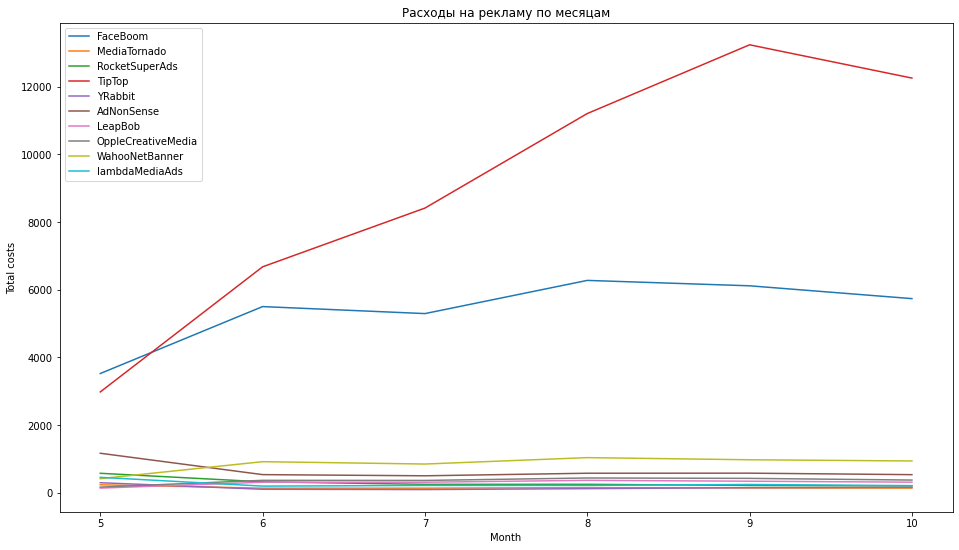

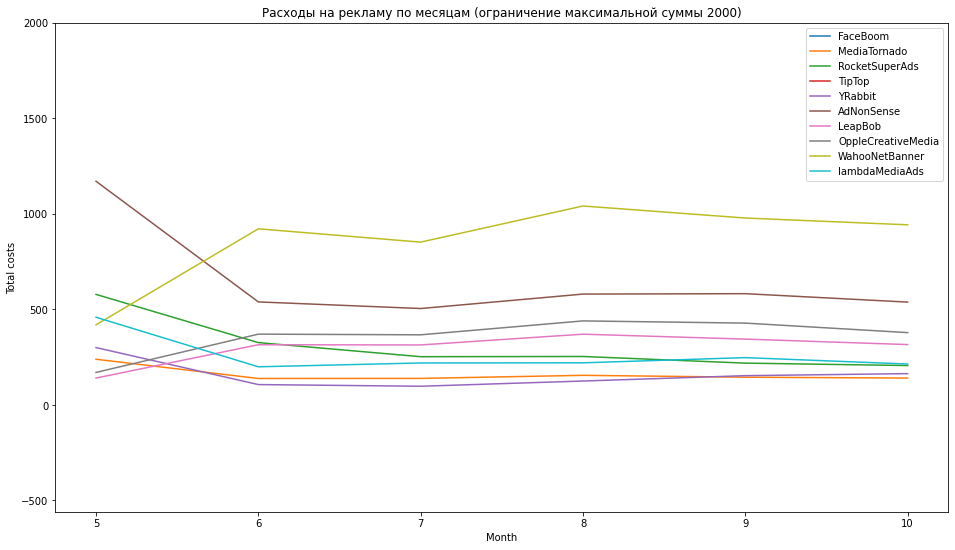

In [42]:
month_costs_plot(costs)
month_costs_plot_limited(costs)


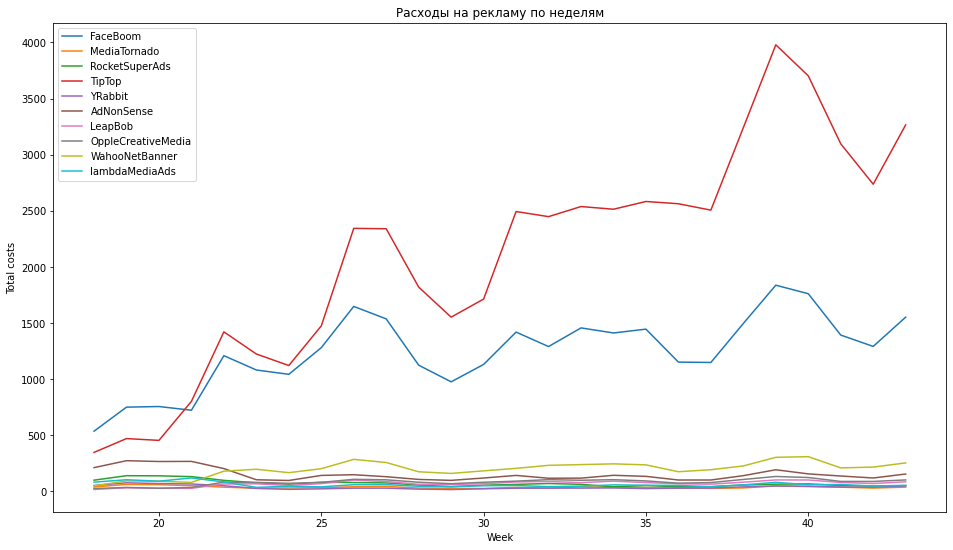

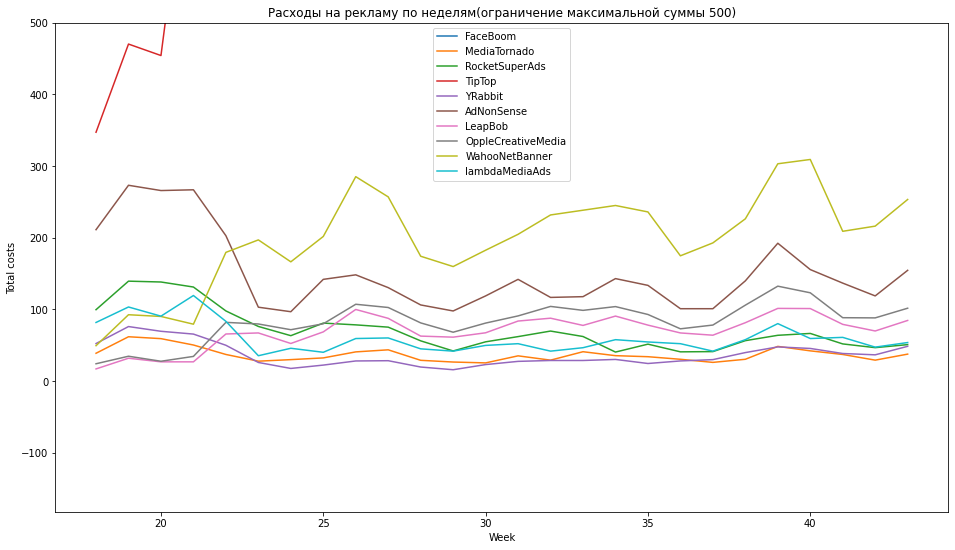

In [43]:
week_costs_plot(costs)
week_costs_plot_limited(costs)

Большая часть рекламного бюджета расходуется на два канала: TipTop, FaceBoom. Расходы выше всего 3 квартале года

In [44]:
# Рассчитаем стоимость среднюю стоимость привлечения клиента
profiles_grouped = pd.pivot_table(profiles, index='channel', values=['user_id'], aggfunc='count')
costs_grouped = pd.pivot_table(costs, index='channel', values='costs', aggfunc='sum')
costs_profiles_merged = costs_grouped.merge(profiles_grouped, on='channel')
costs_profiles_merged['cac'] = costs_profiles_merged['costs']/costs_profiles_merged['user_id']
costs_profiles_merged.sort_values(by='cac')

,costs,user_id,cac
channel,,,
LeapBob,1797.60,8553,0.210172
MediaTornado,954.48,4364,0.218717
YRabbit,944.22,4312,0.218975
OppleCreativeMedia,2151.25,8605,0.250000
RocketSuperAds,1833.00,4448,0.412095
WahooNetBanner,5151.00,8553,0.602245
lambdaMediaAds,1557.60,2149,0.724802
AdNonSense,3911.25,3880,1.008054
FaceBoom,32445.60,29144,1.113286


Заметим, что стоимость привлечения в TipTop очень высокая, есть много источников более дешевых лидов

In [45]:
# Средняя стоимость привлечения
costs_profiles_merged['cac'].mean()

0.7557348976115398

In [46]:
# Например можно вот так посчитать взвешенное среднее
def _some_function(row):
    return row[1] * row[2]


In [47]:
costs_profiles_merged['res'] = costs_profiles_merged.apply(_some_function, axis=1)
costs_profiles_merged

,costs,user_id,cac,res
channel,,,,
AdNonSense,3911.25,3880,1.008054,3911.25
FaceBoom,32445.60,29144,1.113286,32445.60
LeapBob,1797.60,8553,0.210172,1797.60
MediaTornado,954.48,4364,0.218717,954.48
OppleCreativeMedia,2151.25,8605,0.250000,2151.25
RocketSuperAds,1833.00,4448,0.412095,1833.00
TipTop,54751.30,19561,2.799003,54751.30
WahooNetBanner,5151.00,8553,0.602245,5151.00
YRabbit,944.22,4312,0.218975,944.22


In [48]:
weighted_mean = costs_profiles_merged['res'].sum() / costs_profiles_merged['user_id'].sum()
weighted_mean

1.1274813239427595

**Промежуточный вывод:**  
В настоящее время рекламный бюджет используется не оптимально, т.к. большая часть рекламного бюджета расходуется на канал с высокой стоимостью привлечения.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

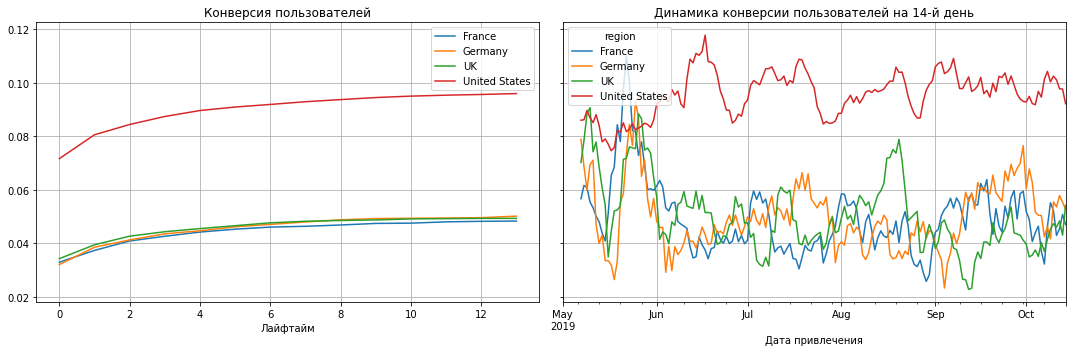

In [49]:
# считаем конверсию в разбивке по регионам
horizon_days = 14

conversion_raw, conversion, conversion_history = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=['region']
)

# строим графики
plot_conversion(conversion, conversion_history, horizon_days, window=7)

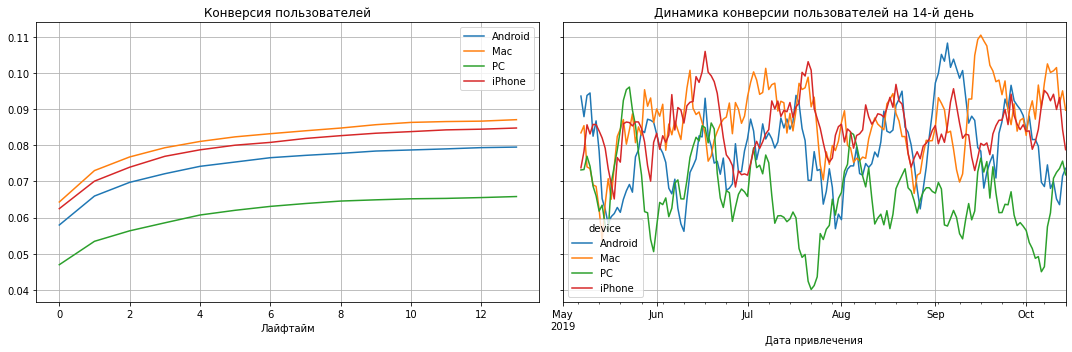

In [50]:
# считаем конверсию в разбивке по устройствам

conversion_raw, conversion, conversion_history = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=['device']
)

# строим графики
plot_conversion(conversion, conversion_history, horizon_days, window=7)

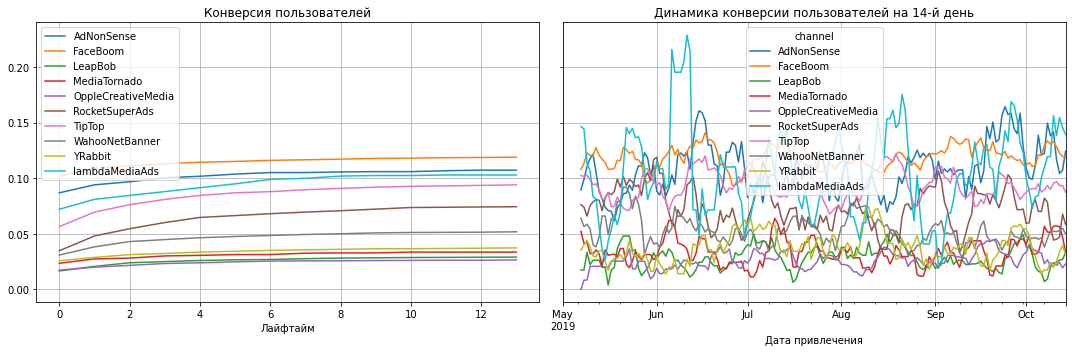

In [51]:
# считаем конверсию в разбивке по каналам привлечения

conversion_raw, conversion, conversion_history = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=['channel']
)

# строим графики
plot_conversion(conversion, conversion_history, horizon_days, window=7)

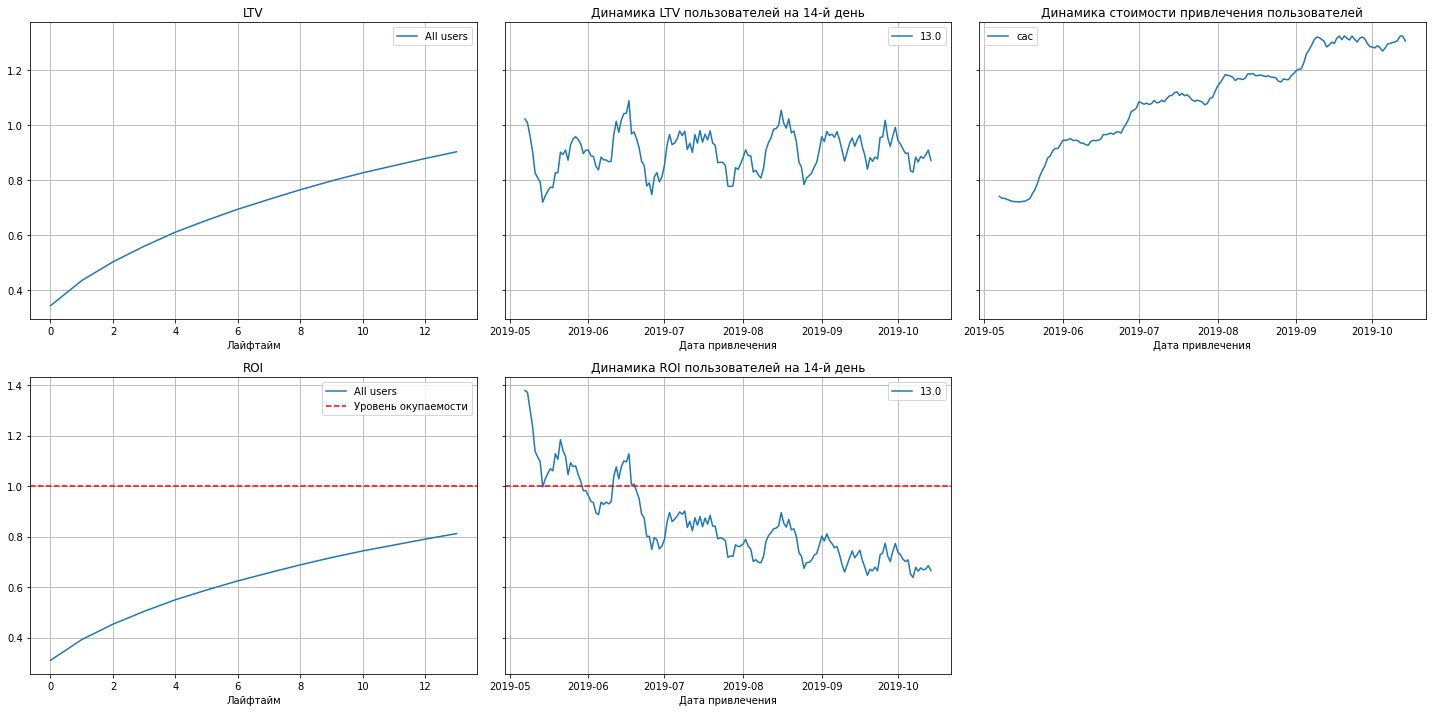

In [52]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Реклама не окупается. Стоимость привлечения линейно возрастает со временем, окупаемость к концу лайфтайма составляет около 80%

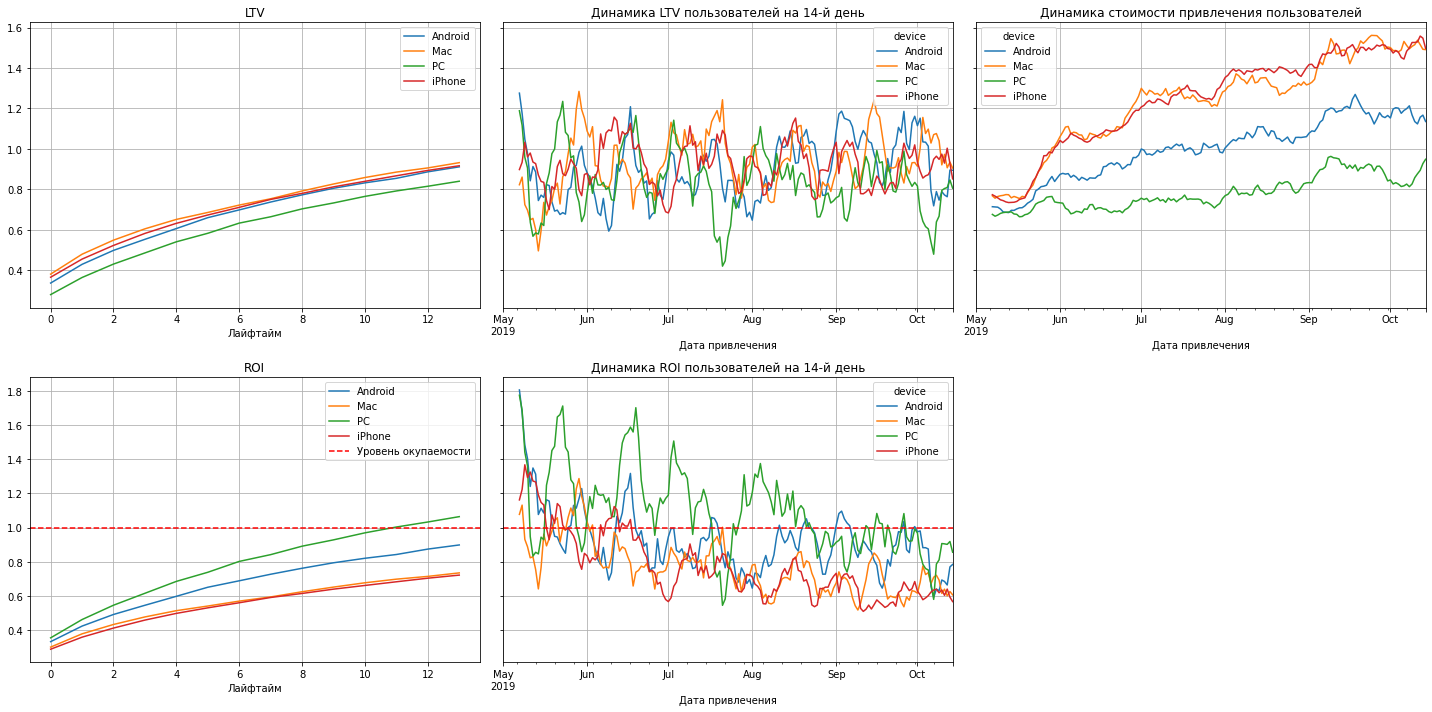

In [53]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Видно, что пользователи PC окупаются и стоимость привлечения у них ниже

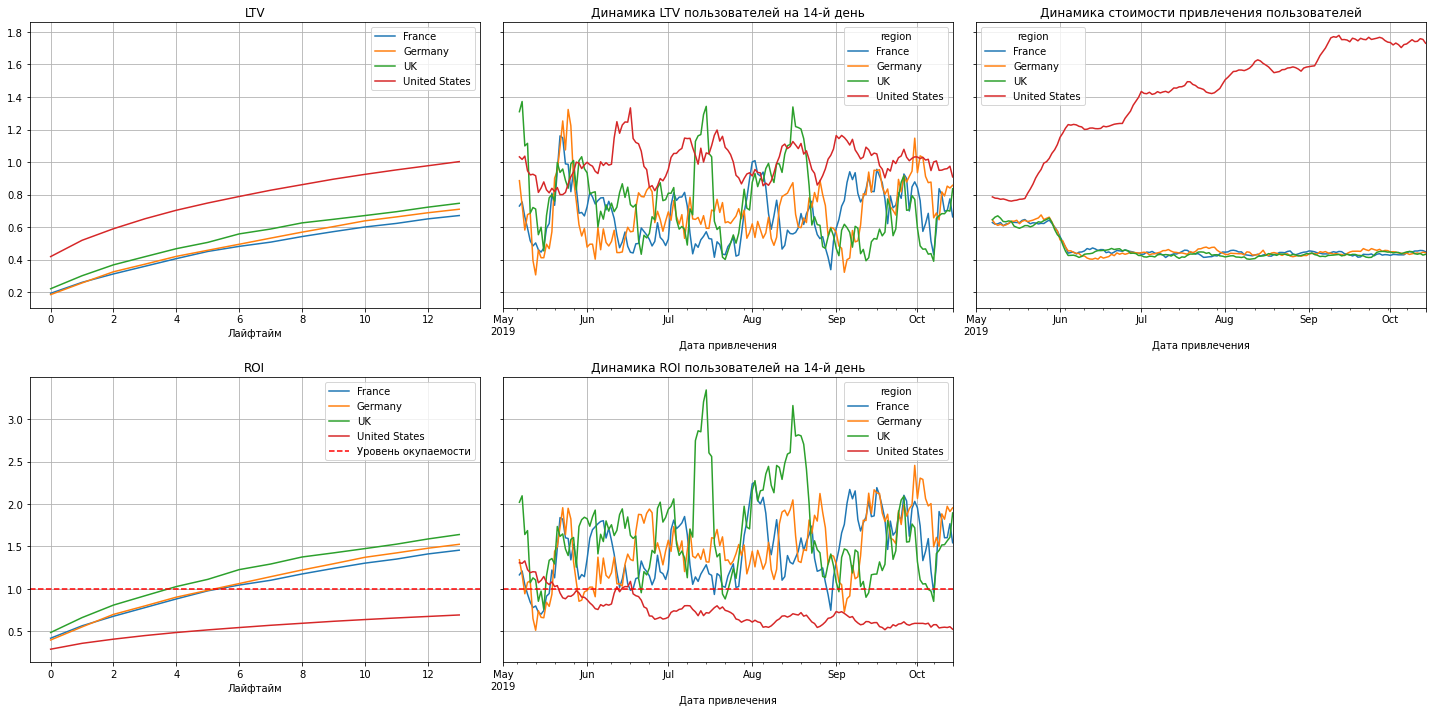

In [54]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

В регионе United States стоимость привлечения намного выше чем в остальных, это единственный регион, в котором клиенты не достигают границы окупаемости

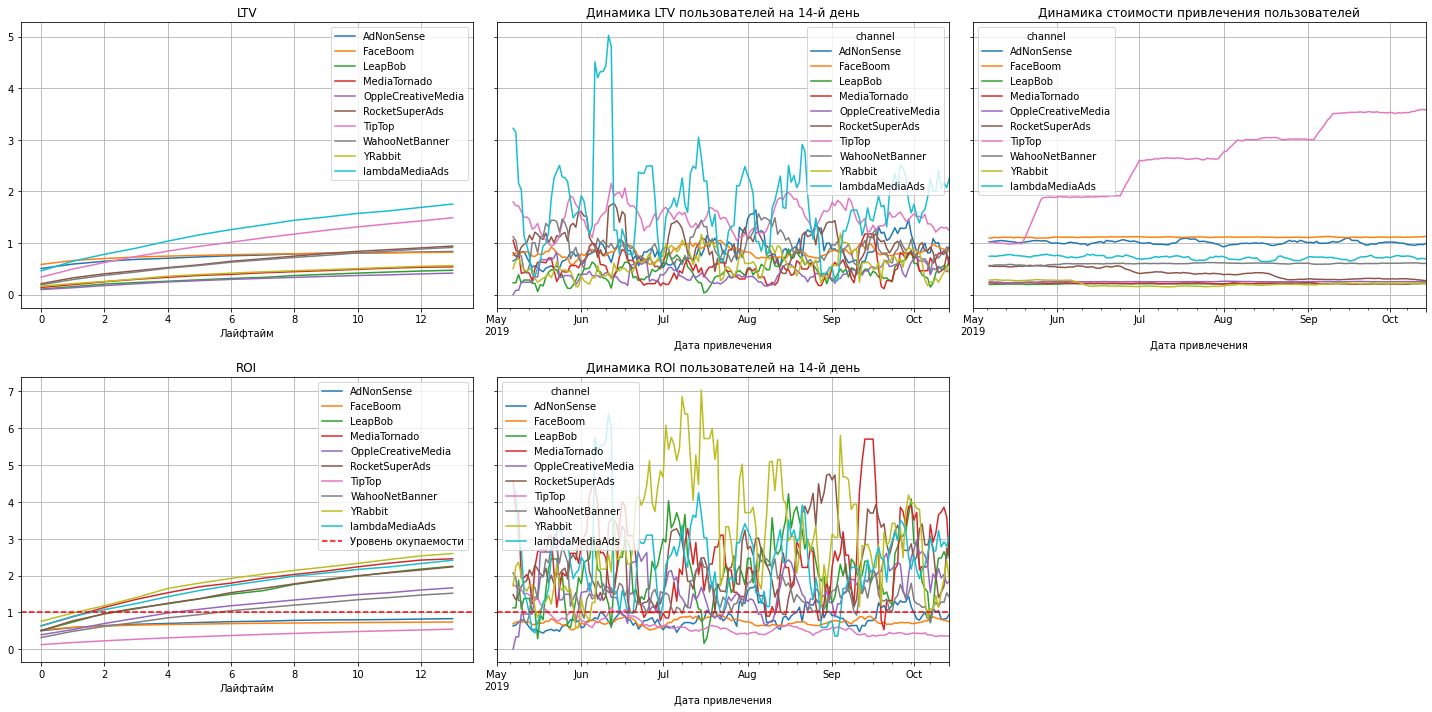

In [55]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Клиенты из TipTop, FaceBoom, AdNonSense не достигают границы окупаемости. Клиенты из YRabbit, lambdaMediaAds наоборот имеют высокий показатель возврата вложений

In [56]:
roi_grouped['avg_roi'] = roi_grouped[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]].sum(axis=1)/14
roi_grouped.sort_values(by='avg_roi', ascending=False)[['avg_roi']]

,avg_roi
channel,
YRabbit,1.856847
MediaTornado,1.753926
lambdaMediaAds,1.688697
RocketSuperAds,1.519399
LeapBob,1.510458
OppleCreativeMedia,1.143284
WahooNetBanner,1.021825
AdNonSense,0.726432
FaceBoom,0.679023


С точки зрения среднего возврата вложений лучше всего выглядят каналы YRabbit, MediaTornado, lambdaMediaAds

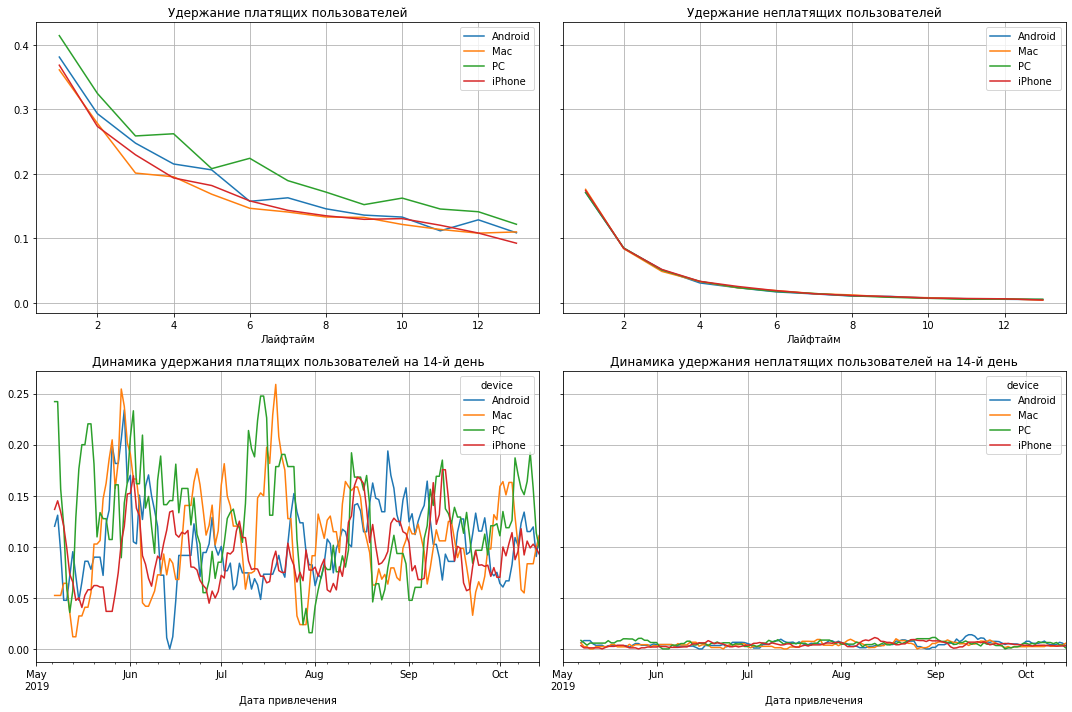

In [57]:
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), visits.query('channel != "organic"'), observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

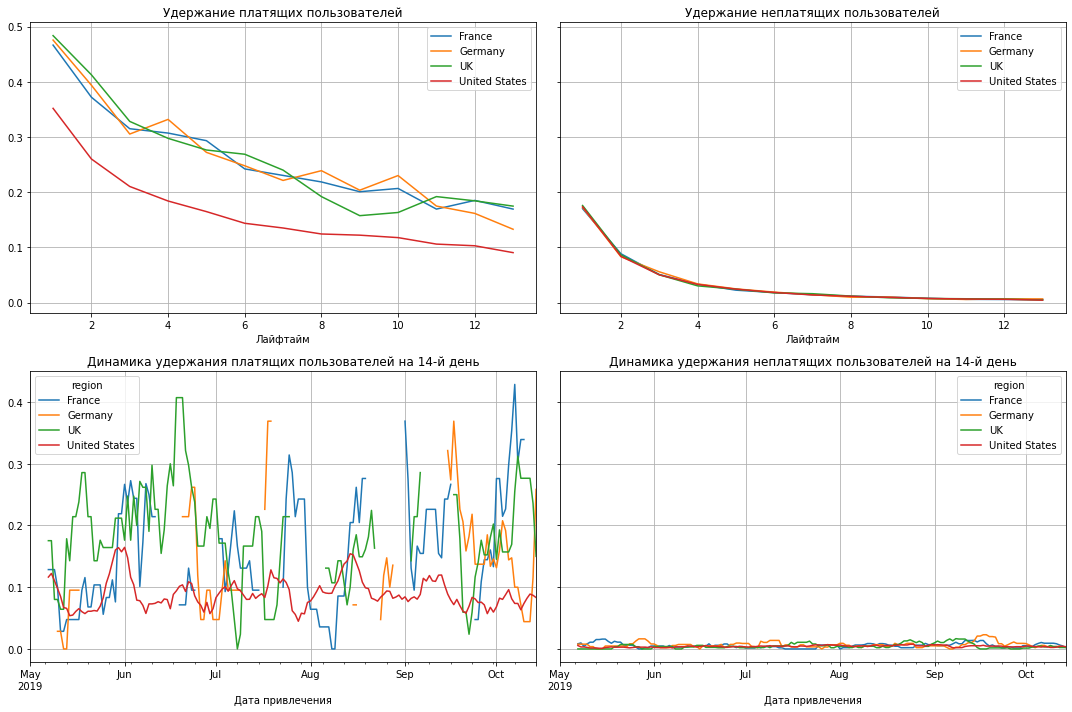

In [58]:
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), visits.query('channel != "organic"'), observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Заметим, что клиенты из региона United States удерживаются заметно хуже остальных

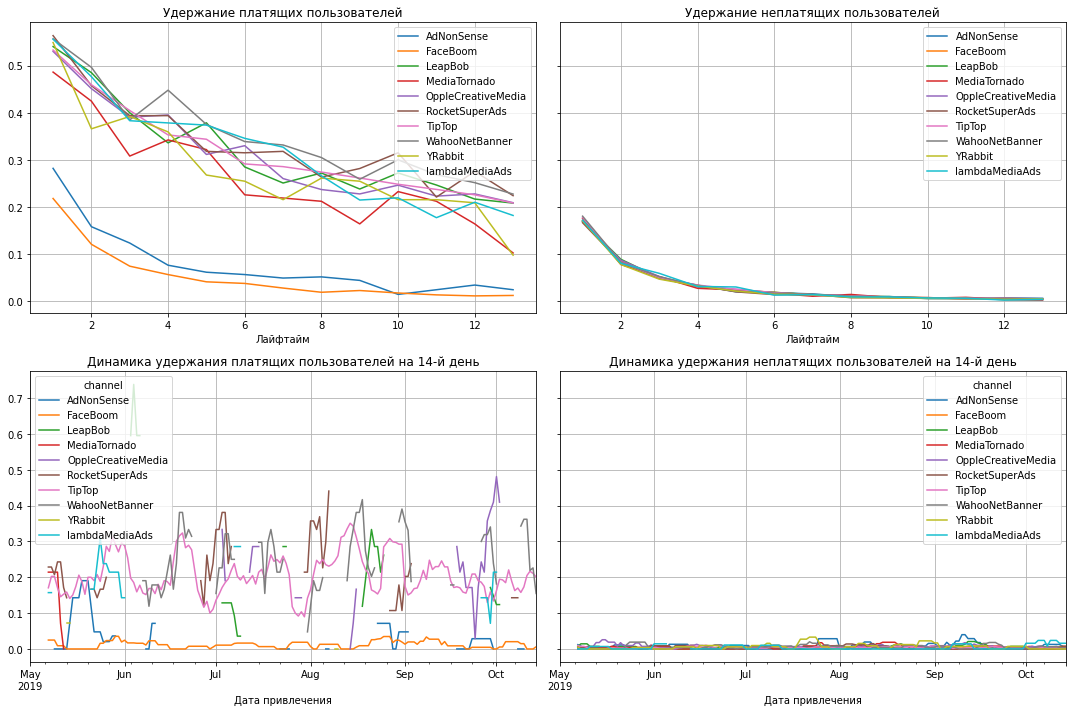

In [59]:
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), visits.query('channel != "organic"'), observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи из FaceBoom имеют низкое удержание

Окупается ли реклама, направленная на привлечение пользователей в целом?  
Нет, не окупается.  

Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?  
Негативное влияние могут оказывать  
устройства: iPhone, Mac  
страны: United States  
каналы: TipTop, FaceBoom, AdNoneSense  
Чем могут быть вызваны проблемы окупаемости?  
Основные факторы на которые я обратил внимание:
- Неоправданно высокие вложения в TipTop, при том, что там самая высокая стоимость привлечения, более чем в два раза выше чем в других каналах
- Клиенты из TipTop, FaceBoom, AdNonSense не достигают границы окупаемости.
- Клиенты из FaceBoom, organic имеют низкое удержание
- Пользователи Mac, iPhone не окупаются
- В United States высокая стоимость привлечения и клиенты не достигают границы окупаемости
- Клиенты из региона United States удерживаются заметно хуже остальных

**Попробуем провести анализ без учета канала organic**

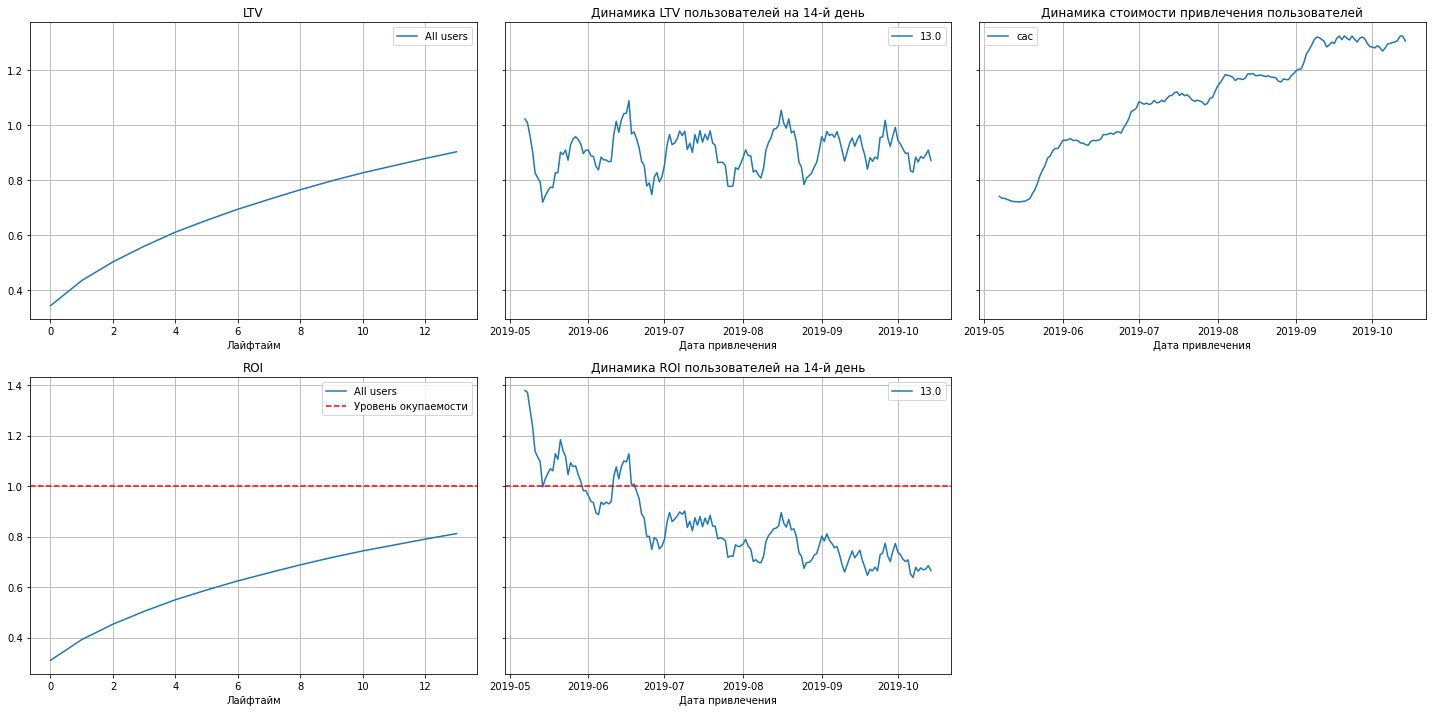

In [60]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

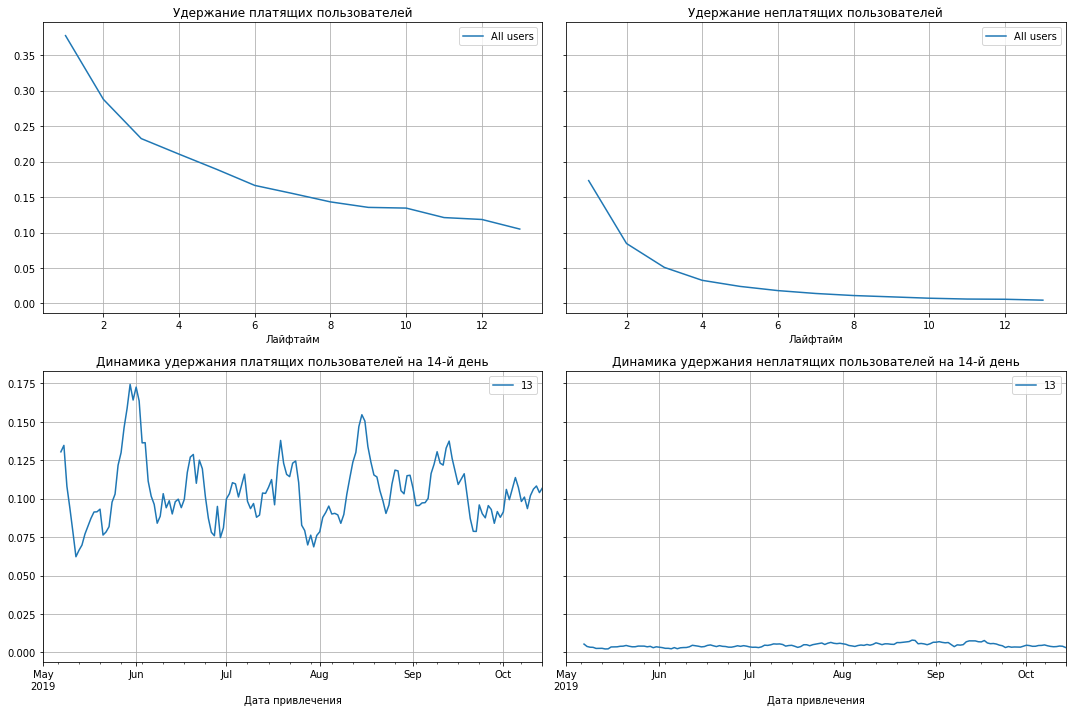

In [61]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), visits.query('channel != "organic"'), observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

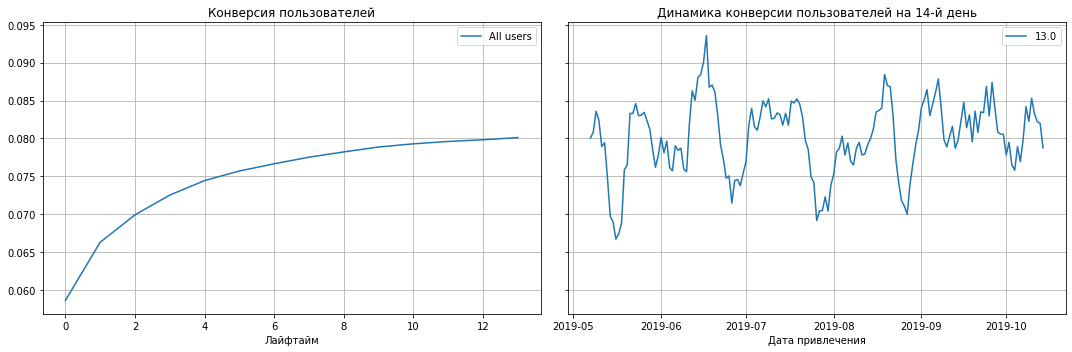

In [62]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days
)

# строим графики
plot_conversion(conversion, conversion_history, horizon_days, window=7)

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Основные причины неэффективности привлечения:
- Неоправданно высокие вложения в TipTop, при том, что там самая высокая стоимость привлечения, более чем в два раза выше чем в других каналах
- Клиенты из TipTop, FaceBoom, AdNonSense не достигают границы окупаемости.
- Клиенты, использующие Mac, iPhone не окупаются
- В United States высокая стоимость привлечения и клиенты не достигают границы окупаемости

Рекомендации для отдела маркетинга:
- Сократить до минимума вложения в TipTop, по возможности снизить вложения в FaceBoom. В приоритете использовать каналы MediaTornado, lambdaMediaAds 
- Направить рекламу на пользователей PC, Android
- Привлечь больше пользователей из France, Germany, UK